## WSD

**Word Sense Disambiguation Applications**


1. WSD can be used alongside Lexicography. Much of the modern Lexicography is corpus-based. WSD, used in Lexicography can provide significant textual indicators.
2. WSD can also be used in Text Mining and Information Extraction tasks. As the major purpose of WSD is to accurately understand the meaning of a word in particular usage or sentence, it can be used for the correct labeling of words.

**For example, from a security point of view, a text system should be able to understand the difference between a coal “mine” and a land “mine”.**

While the former serves industrial purposes, the latter is a security threat. So a text mining application must be able to determine the difference between the two.
Similarly, WSD can be used for Information Retrieval purposes. Information Retrieval systems work through text data primarily based on textual information. Knowing the relevance of using a word in any sentence will surely help.

## Main ways to implement WSD.



1. Dictionary- and knowledge-based methods:

These methods rely on text data like dictionaries, thesaurus, etc. It is based on the fact that words that are related to each other can be found in the definitions. The popularly used Lesk method, which we shall discuss more later is a seminal dictionary-based method.

2. Supervised methods:

In this type, sense-annotated corpora are used to train machine learning models. But, a problem that may arise is that such corpora are very tough and time-consuming to create.

3. Semi-supervised Methods:

Due to the lack of such corpus, most word sense disambiguation algorithms use semi-supervised methods. The process starts with a small amount of data, which is often manually created.

This is used to train an initial classifier. This classifier is used on an untagged part of the corpus, to create a larger training set. Basically, this method involves bootstrapping from the initial data, which is referred to as the seed data.

Semi-supervised methods thus, use both labeled and unlabelled data.

4. Unsupervised Methods:

Unsupervised Methods pose the greatest challenge to researchers and NLP professionals. A key assumption of these models is that similar meanings and senses occur in a similar context. They are not dependent on manual efforts, hence can overcome the knowledge acquisition deadlock.

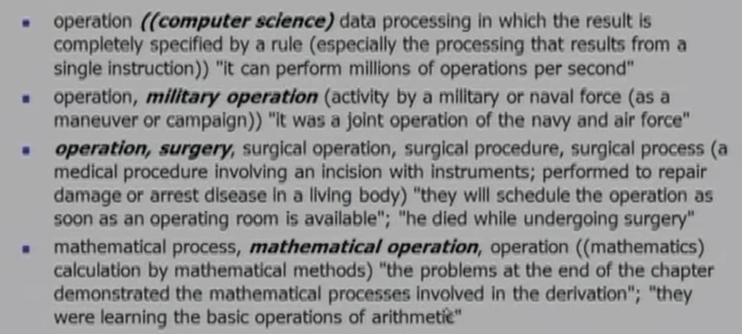

### Lesk Algorithm
Lesk Algorithm is a classical Word Sense Disambiguation algorithm introduced by Michael E. Lesk in 1986.

The Lesk algorithm is based on the idea that words in a given region of the text will have a similar meaning. In the Simplified Lesk Algorithm, the correct meaning of each word context is found by getting the sense which overlaps the most among the given context and its dictionary meaning.
WSD is a match between information in the wordnet and information in the context. 

Principal- Give that sense as the disambiguated sense which has the maximum overlap 'w' or  maximum match considering the Wordnet and the context

In [ ]:
from nltk.corpus import wordnet

def disambiguate(word, sentence):
    c=0
    # Identify the possible synsets of the word
    synsets = wordnet.synsets(word)
    print("The synsets: are \n")
    print(synsets, end='\n\n')
    
    if not synsets:
        return None
    
      # Calculate the similarity between each possible synset and the context
    context = set(sentence)
    
    scores=[]
    score=[]
    
    for i, synset in enumerate(synsets):
        syn_def= synset.definition() 
        syn_lst= syn_def.split()
        common= context.intersection(syn_lst)
        print(f"common words between test sentences and synset {i+1} are \n")
        print(common, end='\n\n')
        scores.append([synset,syn_def,len(common)])
        score.append([syn_def,len(common)])
        
    print(f"Common words between {sentence} and synset are\n")
    print(score, end="\n\n")
    
    # Return the synset with the highest score
    return max(scores, key=lambda x: x[2])[1]
    

In [ ]:
# Example usage
word = 'bank'
sentence = 'I need to deposit some money in the bank'.split()

meaning = disambiguate(word, sentence)

print(f"The word '{word}' in the sentence '{' '.join(sentence)}' can mean:")
print(meaning)

##  Supervised algo-Word sense disambiguation using naive bayes

In [3]:
from collections import Counter
import math

In [4]:
def build_vocab(data):
    vocab = set()
    for sentence in data:
        for word in sentence[0]:
            vocab.add(word)
    return vocab

def count_senses(data):
    senses = Counter()
    for sentence in data:
        senses[sentence[1]] += 1
    return senses

# feature extraction
def count_word_label_pairs(data):
    features = {}
#     (,"river"
    for sentence in data:
        for word in sentence[0]:
#             ['they', 'pulled', 'the', 'canoe', 'up', 'on', 'the', 'bank']
            if word not in features:
                features[word] = Counter()
            features[word][sentence[1]] += 1
    return features

In [5]:
# Data Preparation

data=[(['they', 'pulled', 'the', 'canoe', 'up', 'on', 'the', 'bank'],"river"), 
      (['he', 'sat', 'on', 'the', 'bank', 'of', 'the', 'river', 'and', 'watched', 'the', 'currents'], "river"), 
      (['he', 'cashed', 'a', 'check', 'at', 'the', 'bank'], "finance"),
      (['I', 'need', 'to', 'deposit', 'money', 'in', 'the', 'bank'], "finance"), 
      (['that', 'bank', 'holds', 'the', 'mortgage', 'on', 'my', 'home'], "finance")]


vocab= build_vocab(data)
print(f'vocab is : \n {vocab}')
print()
senses= count_senses(data)
print(f'senses count is: \n {senses}')
print()
features= count_word_label_pairs(data)
print(f'features extracted are: \n{features}')

vocab is : 
 {'need', 'at', 'in', 'sat', 'I', 'check', 'cashed', 'pulled', 'bank', 'that', 'watched', 'my', 'he', 'currents', 'river', 'money', 'on', 'and', 'a', 'to', 'deposit', 'they', 'home', 'canoe', 'the', 'mortgage', 'of', 'up', 'holds'}

senses count is: 
 Counter({'finance': 3, 'river': 2})

features extracted are: 
{'they': Counter({'river': 1}), 'pulled': Counter({'river': 1}), 'the': Counter({'river': 5, 'finance': 3}), 'canoe': Counter({'river': 1}), 'up': Counter({'river': 1}), 'on': Counter({'river': 2, 'finance': 1}), 'bank': Counter({'finance': 3, 'river': 2}), 'he': Counter({'river': 1, 'finance': 1}), 'sat': Counter({'river': 1}), 'of': Counter({'river': 1}), 'river': Counter({'river': 1}), 'and': Counter({'river': 1}), 'watched': Counter({'river': 1}), 'currents': Counter({'river': 1}), 'cashed': Counter({'finance': 1}), 'a': Counter({'finance': 1}), 'check': Counter({'finance': 1}), 'at': Counter({'finance': 1}), 'I': Counter({'finance': 1}), 'need': Counter({'finan

In [ ]:
feature={'they': Counter({'river': 1}), 'pulled': Counter({'river': 1}), 'the': Counter({'river': 5, 'finance': 3})}
feature['the'].values()

In [ ]:
def predict(sentence, data, vocab, senses, features):
    sense_probs = {}
    for sense in senses:
        sense_probs[sense] = math.log(senses[sense] / len(data))
#         print(sense_probs)

        for word in sentence:
#         = ["I", "went", "to", "bank", "deposit"]
            if word in vocab:
                count = features["deposit"]["finance"] if sense in features[word] else 0
                sense_probs[sense] += math.log((count + 1) / (sum(features[word].values()) + len(vocab)))
            else:
                sense_probs[sense] += math.log(1 / len(vocab))
                
        print(sense_probs)
        
    return max(sense_probs, key=sense_probs.get)

In [ ]:
sentence1 = ["I", "went", "to", "bank", "deposit"]
sentence2 = ["river", "bank", "travel"]
print(predict(sentence1, data, vocab, senses, features))
print(predict(sentence2, data, vocab, senses, features))

We will use the senseval-2 corpus for our training and test data. This corpus consists of text from a mixture of places, including the British National Corpus and the Penn Treebank portion of the Wall Street Journal. Each word in the corpus is tagged with its part of speech, and the senses of the following target words are also manually annotated: the nouns interest, line; the verb serve and the adjective hard.